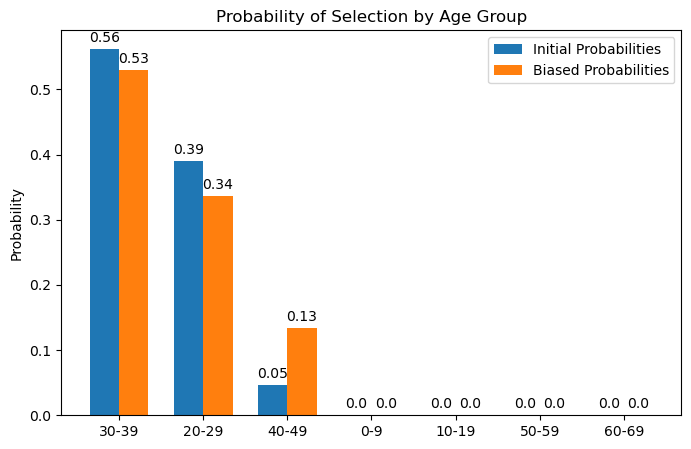

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('employees.csv')

# Define the bins for the age groups
bins = [0, 9, 19, 29, 39, 49, 59, 69]

# Define the labels for the age groups
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69']

# Create a new column 'Age_Group' using the cut function
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

initial_probabilities = df['Age_Group'].value_counts(normalize=True)

# Assign weights
df['sample_weight'] = df['Age_Group'].apply(lambda x: 3 if x == '40-49' else 1)

# Biased sample
sampled_df = df.sample(n=1000, weights='sample_weight', random_state=1, replace=True)
biased_probabilities = sampled_df['Age_Group'].value_counts(normalize=True)

fig, ax = plt.subplots(figsize=(8, 5))
width = 0.35  # bar width
indices = range(len(initial_probabilities))  # x locations for the groups

rects1 = ax.bar(indices, initial_probabilities, width, label='Initial Probabilities')
rects2 = ax.bar([i + width for i in indices], biased_probabilities, width, label='Biased Probabilities')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Probability')
ax.set_title('Probability of Selection by Age Group')
ax.set_xticks([i + width / 2 for i in indices])
ax.set_xticklabels(initial_probabilities.index)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


In [22]:
import pandas as pd
import hashlib

def anonymize_data(data):
    # Hash the data to anonymize
    return hashlib.sha256(data.encode()).hexdigest()[:len(data)]  

def anonymise_email(data):
    # Split the email into username and domain
    username, domain = data.split('@')
    # Hash the username to anonymize
    anonymized_username = hashlib.sha256(username.encode()).hexdigest()[:len(username)]  # Shorten the hash for readability
    # Concatenate the anonymized username with the domain
    return anonymized_username + '@' + domain

# Load the data
df = pd.read_csv('employees.csv')
# Anonymize the First Name, Last Name, Email, and Phone Number
df['First Name'] = df['First Name'].apply(anonymize_data)
df['Last Name'] = df['Last Name'].apply(anonymize_data)
df['Email'] = df['Email'].apply(anonymise_email)
df['Phone'] = df['Phone'].apply(lambda x: 'XXX-XXX-' + x[-4:])  # Preserve the format partially for phone

# Display the anonymized DataFrame
print(df[['First Name', 'Last Name', 'Email', 'Phone']])


    First Name  Last Name                                    Email  \
0         ae97      95c5d           74da56e30c5b9@slingacademy.com   
1        1b4e1     25eb92         7bba78f3a84f7fc@slingacademy.com   
2        66e52     7229de         08295ab4fe4f653@slingacademy.com   
3       11e442     ea49f5        64740111356baacb@slingacademy.com   
4         5fbf     680ce3          af9579a2e0d9c9@slingacademy.com   
..         ...        ...                                      ...   
315   cbb666f6     ab4e7b    af9183631080fd2ee67c@slingacademy.com   
316     836072      c625c       ee7692d1cd2167ae2@slingacademy.com   
317      0e4dd  503046646    aff60ff8b72dc0a7913e@slingacademy.com   
318  9cb20def8       8e80     5c97a5ef619bc592c00@slingacademy.com   
319   76db6b6c   41df7341  4ddf656cb2fb69c2fc9dc4@slingacademy.com   

            Phone  
0    XXX-XXX-1542  
1    XXX-XXX-0107  
2    XXX-XXX-x493  
3    XXX-XXX-4648  
4    XXX-XXX-5842  
..            ...  
315  XXX-XXX-6802  

In [23]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('employees.csv')



age_noise = np.random.normal(0,2, len(df))
salary_noise = np.random.normal(0,4, len(df))
exp_noise = np.random.normal(0,3, len(df))

df['Age'] = round(df["Age"] + age_noise).astype(pd.Int64Dtype())
df['Salary'] = round(df["Salary"] + salary_noise).astype(pd.Int64Dtype())
df['Years Of Experience'] = round(df["Years Of Experience"] + exp_noise).astype(pd.Int64Dtype())

# Display the perturbed DataFrame
print(df.head())

  First Name Last Name                              Email  \
0       Jose     Lopez     joselopez0944@slingacademy.com   
1      Diane    Carter   dianecarter1228@slingacademy.com   
2      Shawn    Foster   shawnfoster2695@slingacademy.com   
3     Brenda    Fisher  brendafisher3185@slingacademy.com   
4       Sean    Hunter    seanhunter4753@slingacademy.com   

                  Phone  Gender  Age                  Job Title  \
0  +1-971-533-4552x1542    male   27            Project Manager   
1          881.633.0107  female   27  Machine Learning Engineer   
2  001-966-861-0065x493    male   35            Project Manager   
3      001-574-564-4648  female   31              Web Developer   
4            5838355842    male   32            Project Manager   

   Years Of Experience  Salary Department  
0                   -3    8496    Product  
1                    4    6998    Product  
2                   13   16998    Product  
3                    9    9999    Product  
4         

In [20]:
pip install faker


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


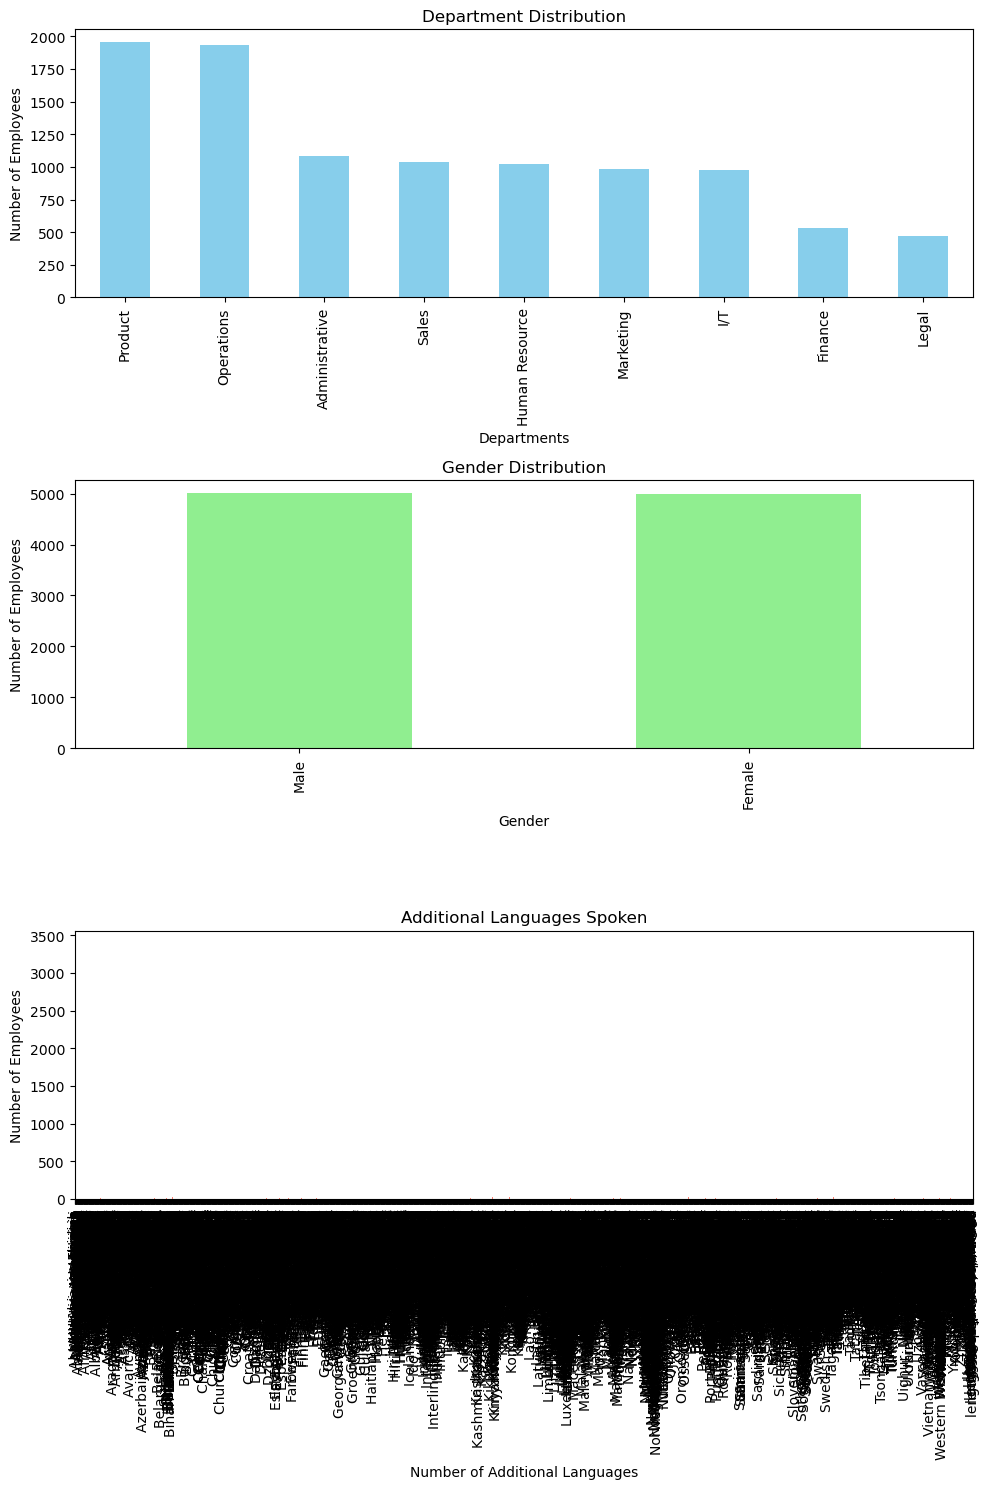

  First Name Last Name                        Email             Phone  Gender  \
0         정희         권           qcheng@example.net  604-876-4759x382  Female   
1     Pranay     Kumer           qcheng@example.net      061-048-7647  Female   
2   Samantha  Gallegos        ysullivan@example.com  487-364-7593x824    Male   
3         兰英     Silva           weigao@example.com        04 5759382  Female   
4         미경    Tejada  williamcampbell@example.org    (382) 421-9489    Male   

   Age                  Job Title  Years Of Experience  Salary  \
0   47         Product Specialist                   26  126400   
1   23  Human Resource Specialist                   26   95400   
2   46           Legal Specialist                   30   60000   
3   58      Operations Specialist                   16   76293   
4   43         Finance Specialist                   39   67000   

       Department          SSN              Languages  
0         Product  141-59-1663                  Malay  
1  H

In [18]:
from faker import Faker
import numpy as np
from collections import OrderedDict

# Create a Faker instance with locale support for specified countries
locales = ['en_IN', 'zh_CN', 'en_CA', 'ko_KR', 'tl_PH', 'zh_TW', 'es_MX', 'en_US']
weights = [0.745, 0.118, 0.01, 0.009, 0.006, 0.006, 0.006, 0.1]  # Proportional weights for each locale

# Determine the number of entries for each locale based on weights
num_entries = 10000
entries_per_locale = np.random.multinomial(num_entries, weights)

# Initialize Faker with weighted locales
fake = Faker(locales)

# Define salary percentiles for each department
salary_ranges = {
    'Marketing': [56750, 67255, 78793, 90388, 100944],
    'Legal': [46317, 60000, 72293, 85400, 95249],
    'Administrative': [56317, 67000, 76293, 95400, 105249],
    'Operations': [56317, 67000, 76293, 95400, 105249],
    'Sales': [56317, 67000, 76293, 95400, 105249],
    'Finance': [56317, 67000, 76293, 95400, 105249],
    'I/T': [56317, 67000, 76293, 95400, 105249],
    'Product': [76317, 97000, 106293, 126400, 145249],
    'Human Resource': [56317, 67000, 76293, 95400, 105249]
}

# Define department distribution
departments = ['Legal', 'Marketing', 'Administrative', 'Operations', 'Sales', 'Finance', 'I/T', 'Product', 'Human Resource']
department_weights = [0.05, 0.1, 0.1, 0.2, 0.1, 0.05, 0.1, 0.2, 0.1]

# Convert department_weights to OrderedDict
department_distribution = OrderedDict(zip(departments, department_weights))

# Generate synthetic data
data = []
for i, locale in enumerate(locales):
    fake.seed_instance(i)
    for _ in range(entries_per_locale[i]):
        gender = fake.random_element(elements=('Male', 'Female'))
        department = fake.random_element(elements=department_distribution)
        salary_percentiles = np.random.choice(salary_ranges[department], size=1, p=[0.1, 0.15, 0.5, 0.15, 0.1])[0]
        years_of_experience = fake.random_int(min=0, max=50)
        min_age = years_of_experience + 22
        max_age = years_of_experience + 40
        age = fake.random_int(min=min_age, max=max_age)
        languages = [fake.language_name() for _ in range(fake.random_int(min=0, max=2))]
        
        employee = {
            'First Name': fake.first_name(),
            'Last Name': fake.last_name(),
            'Email': fake.email(),
            'Phone': fake.phone_number(),
            'Gender': gender,
            'Age': fake.random_int(min=21, max=60),
            'Job Title': f"{department} Specialist",
            'Years Of Experience': fake.random_int(min=0, max=40),
            'Salary': salary_percentiles,
            'Department': department,
            'SSN': f"{fake.random_int(min=100, max=999)}-{fake.random_int(min=10, max=99)}-{fake.random_int(min=1000, max=9999)}",
            'Languages': ', '.join(languages)
        }
        data.append(employee)

# Convert data to DataFrame to verify
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(data)
df.head(20)

# Plotting the distributions
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Department distribution plot
df['Department'].value_counts().plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Department Distribution')
ax[0].set_xlabel('Departments')
ax[0].set_ylabel('Number of Employees')

# Gender distribution plot
df['Gender'].value_counts().plot(kind='bar', ax=ax[1], color='lightgreen')
ax[1].set_title('Gender Distribution')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Number of Employees')

# Languages distribution plot
df['Languages'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='salmon')
ax[2].set_title('Additional Languages Spoken')
ax[2].set_xlabel('Number of Additional Languages')
ax[2].set_ylabel('Number of Employees')

plt.tight_layout()
plt.show()
print(df.head())